## Personal Loan Prediction | Logistic Regression & Decision Tree

In [73]:
## Database Phase
import pandas as pd
import numpy as np
import zipcodes as zcode 

# Machine Learning Phase
import statsmodels.api as sm
import xgboost as xgb
import sklearn 
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import zipcodes as zcode 
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, f1_score, precision_score,confusion_matrix, accuracy_score,roc_auc_score,classification_report,roc_curve
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
#Visualization Phase
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read dataframe
df=pd.read_csv("data/Bank_Personal_Loan_Modelling.csv")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df.shape

(5000, 14)

In [4]:
## To get a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
# statistical Description
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [6]:
df[['ID','ZIP Code']] = df[['ID','ZIP Code']].astype('str')

In [7]:
df.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.34,11.46,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.10,11.47,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.77,46.03,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.40,1.15,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.94,1.75,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.88,0.84,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.50,101.71,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.10,0.29,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.10,0.31,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.06,0.24,0.0,0.0,0.0,0.0,1.0


In [8]:
# #As we can see from the describe funcrtion, experience has negative values, we must understand it's association with 
# any other quantitatyive value to make any changes to the neg values.

In [9]:
# check null values
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [10]:
# check the categorical features
catg_features=[col for col in df.columns if ((df[col].dtypes=='O') & (col not in ['deposit']))]
print(catg_features)

['ID', 'ZIP Code']


In [11]:
# check the numerical features
num_features=[col for col in df.columns if ((df[col].dtypes!='O') & (col not in ['deposit']))]
print(num_features)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


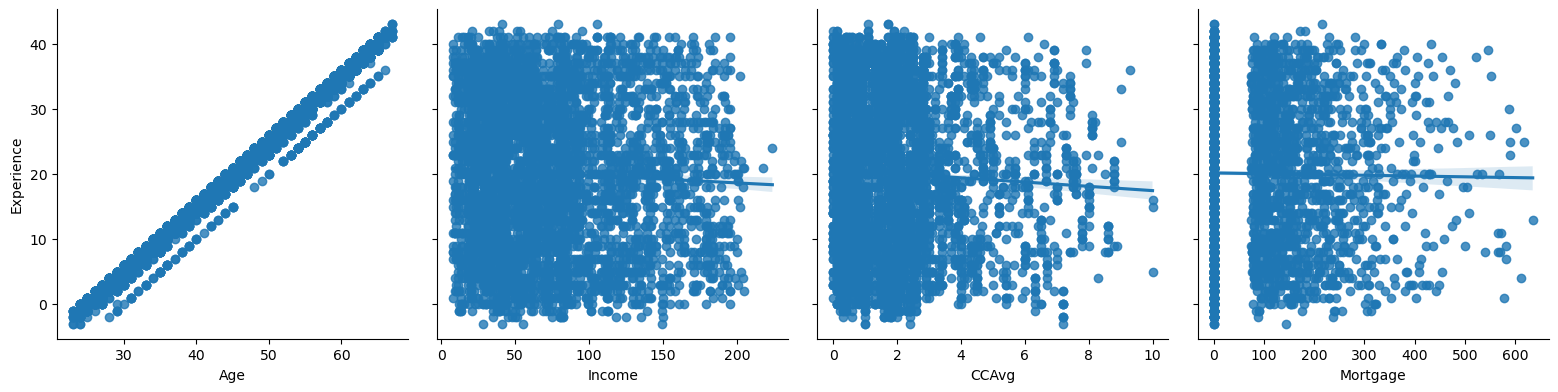

In [12]:
## relation of variables with the experiences
ncol = ['Age', 'Income','CCAvg', 'Mortgage']
grid = sns.PairGrid(df, y_vars = 'Experience', x_vars = ncol, height = 4)
grid.map(sns.regplot)
plt.savefig('images/personal/pairplot.png')

In [13]:
#Checking age groups with negative values.
df[df['Experience'] < 0]['Age'].value_counts()

25    18
24    17
23    12
29     3
28     1
26     1
Name: Age, dtype: int64

In [14]:
# Take age groups in a list
grp = df[df['Experience'] < 0]['Age'].unique().tolist()
#Since very few values are negative in each group, we can fill it with corresponding positive age mean of same age group

In [15]:
# Take age groups in a list
grp = df[df['Experience'] < 0]['Age'].unique().tolist()

In [16]:
# Take indexes of all negative experience values
indexes = df[df['Experience'] < 0].index.tolist()

In [17]:
# A small code which uses both lists to replace negatives with means
for i in indexes:
    for x in grp:
        df.loc[i,'Experience'] = df[(df.Age == x) & (df.Experience > 0)].Experience.mean()

In [18]:
df[df['Experience']<0]['Experience'].count()


0

In [19]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1.0,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19.0,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15.0,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9.0,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8.0,45,91330,4,1.0,2,0,0,0,0,0,1


## Exploratory Data analysis

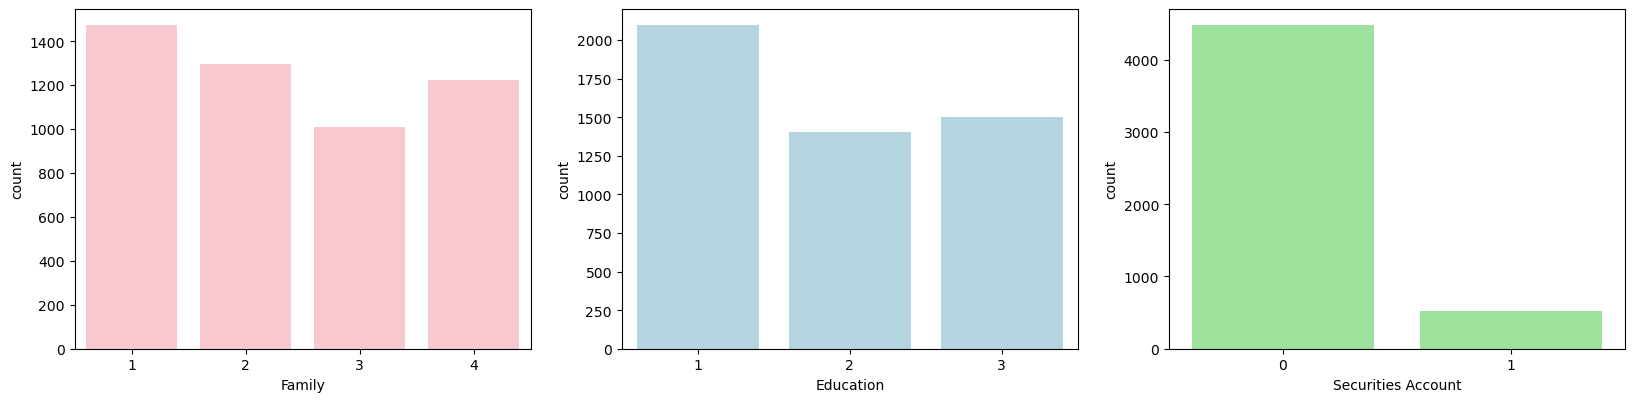

In [20]:
## univariant analysis of Categorical features individually
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.countplot(df["Family"], color='pink')
plt.xlabel('Family')

plt.subplot(3,3,2)
sns.countplot(df["Education"], color='lightblue')
plt.xlabel('Education')

plt.subplot(3,3,3)
sns.countplot(df["Securities Account"], color='lightgreen')
plt.xlabel('Securities Account')

plt.savefig('images/personal/categorical.png')
plt.show()

In [21]:
# Most of the customers have a family size less than or equal to two
# More than 60% of the customers have either have Graduate level education or more(1:Undergrad; 2: Graduate; 3: Advanced/Professional)
# More than 90% of the customers do not have securities account

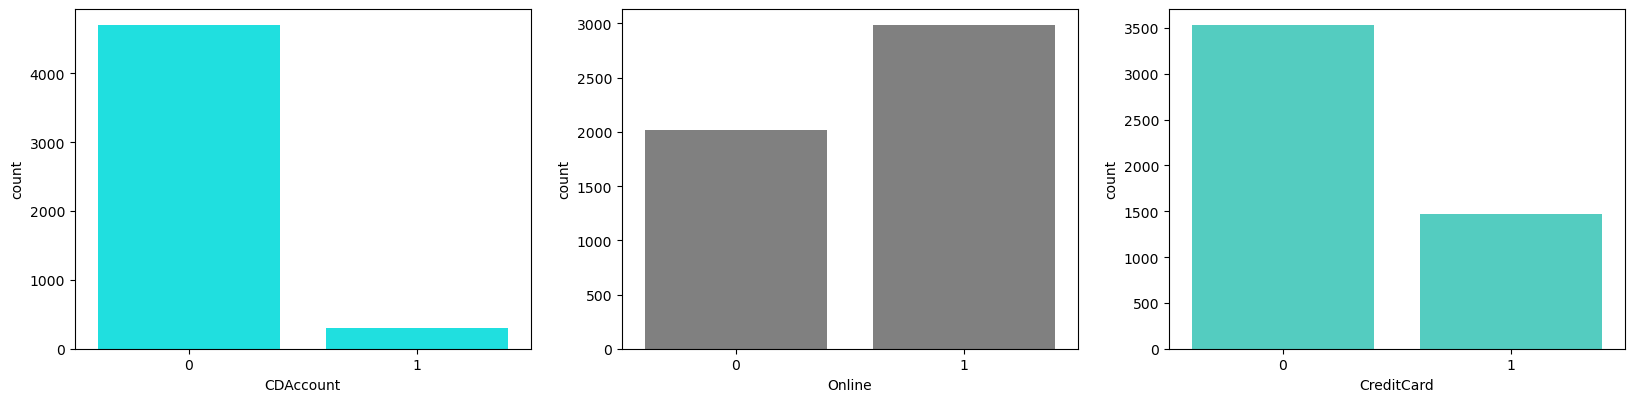

In [22]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.countplot(df["CD Account"], color='cyan')
plt.xlabel('CDAccount')

plt.subplot(3,3,2)
sns.countplot(df["Online"], color='grey')
plt.xlabel('Online')

plt.subplot(3,3,3)
sns.countplot(df["CreditCard"], color='turquoise')
plt.xlabel('CreditCard')

plt.savefig('images/personal/categorical2.png')
plt.show()

In [23]:
# More than 90% of the customers do not have CD account
# More than 50% of the customers use online services
# Nearly 30% of the customers hold a credit card

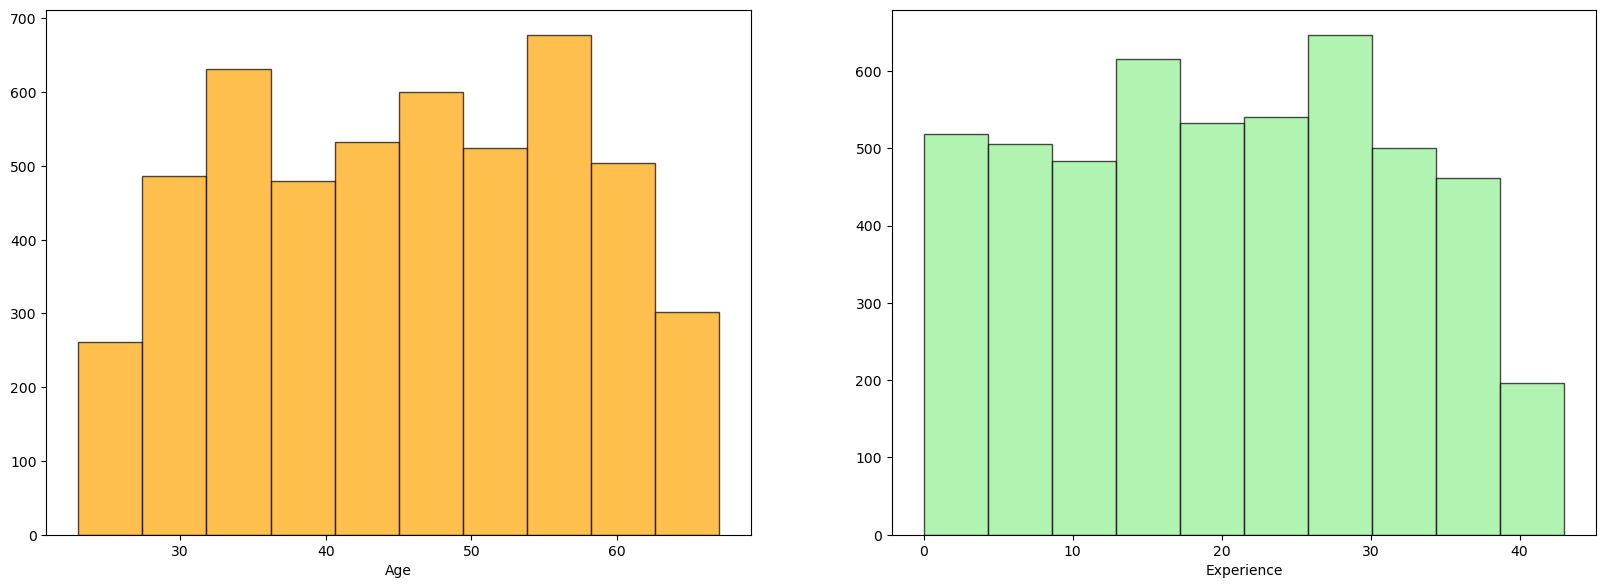

In [24]:
#Plots to see the distribution of the Continuos features AGE AND EXPERIENCE individually

plt.figure(figsize= (20,15))
plt.subplot(2,2,1)
plt.hist(df["Age"], color='orange', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Age')

plt.subplot(2,2,2)
plt.hist(df["Experience"], color='lightgreen', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Experience')
plt.savefig('images/personal/featuresVsExp.png')
plt.show()

In [25]:
# Majority of the customers are in the age groups 30's and 50's
# 15 to 30 years is the age range in between which most customers lie.

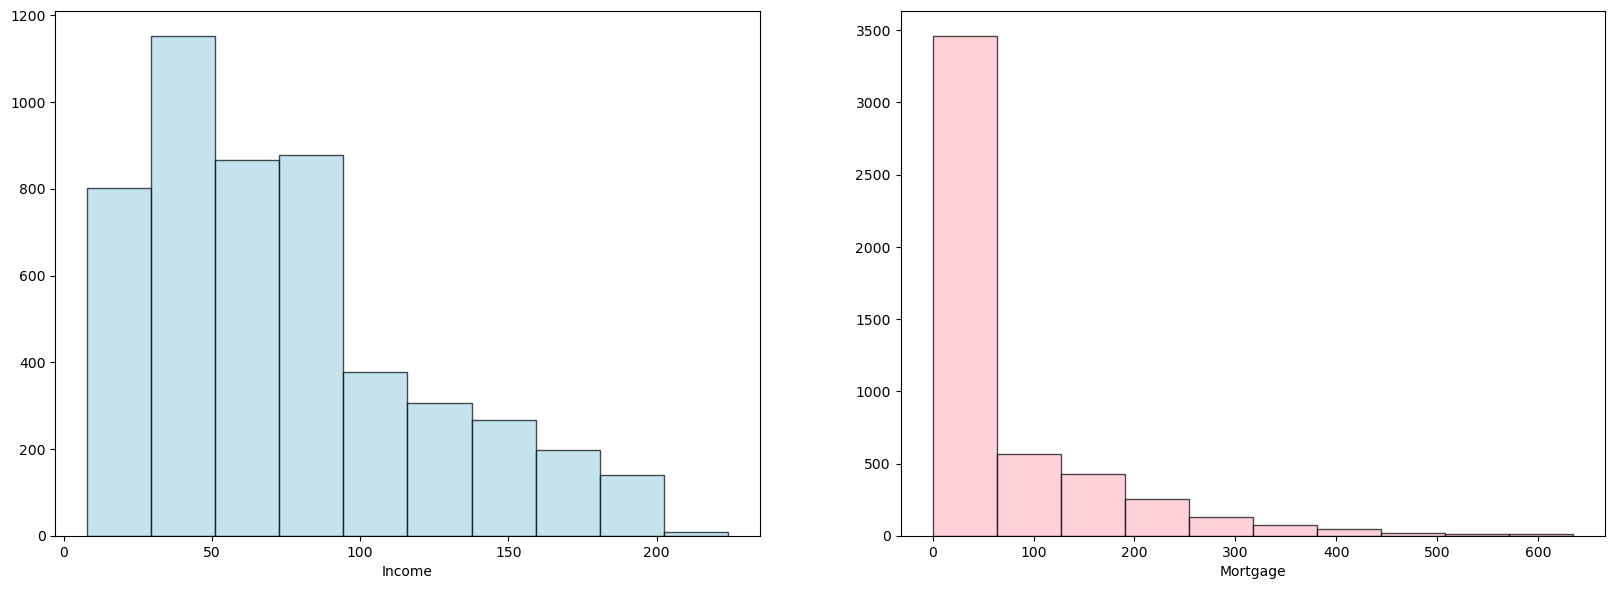

In [26]:
#Plots to see the distribution of the Continuos features INCOME AND MORTGAGE individually
plt.figure(figsize= (20,15))
plt.subplot(2,2,3)
plt.hist(df["Income"], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Income')

plt.subplot(2,2,4)
plt.hist(df["Mortgage"], color='Pink', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Mortgage')
plt.savefig('images/personal/INCOMEvsMORTGAGE.png')

In [27]:
# Majority of the customers have an income of around 25 to 50 thousand USD
# Most of the customers have the mortgage valued lesser than 100 thousand USD

In [28]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [29]:
## plot relationship between features and target column deposit
def create_countplot(data, feature, palette, save_path):
    plt.figure(figsize=(14, 5))
    sns.countplot(x=feature, hue='Personal Loan', data=data, palette=palette)
    plt.savefig(save_path)
    plt.show()

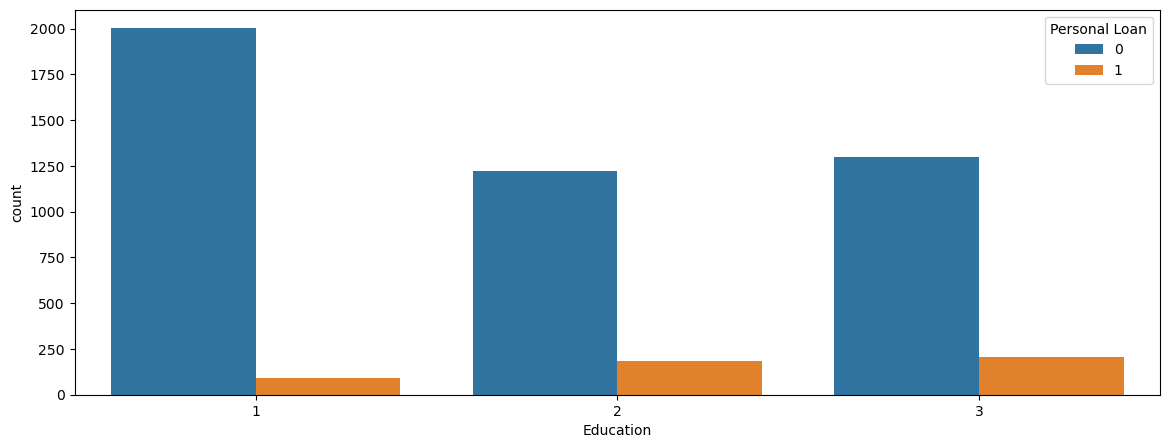

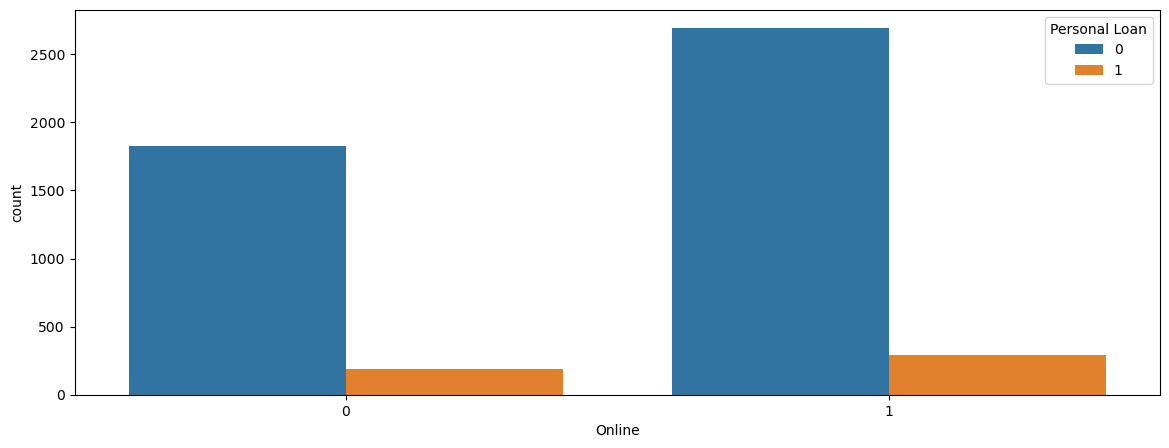

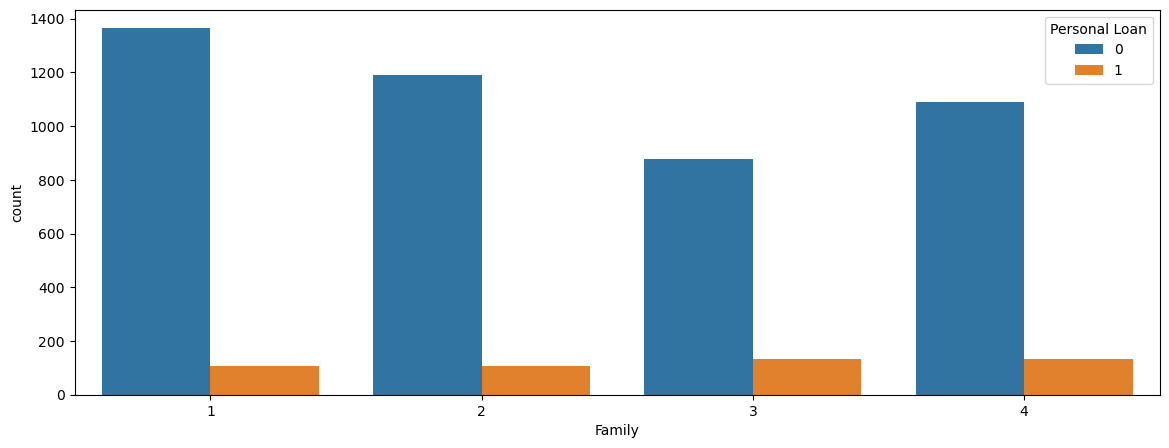

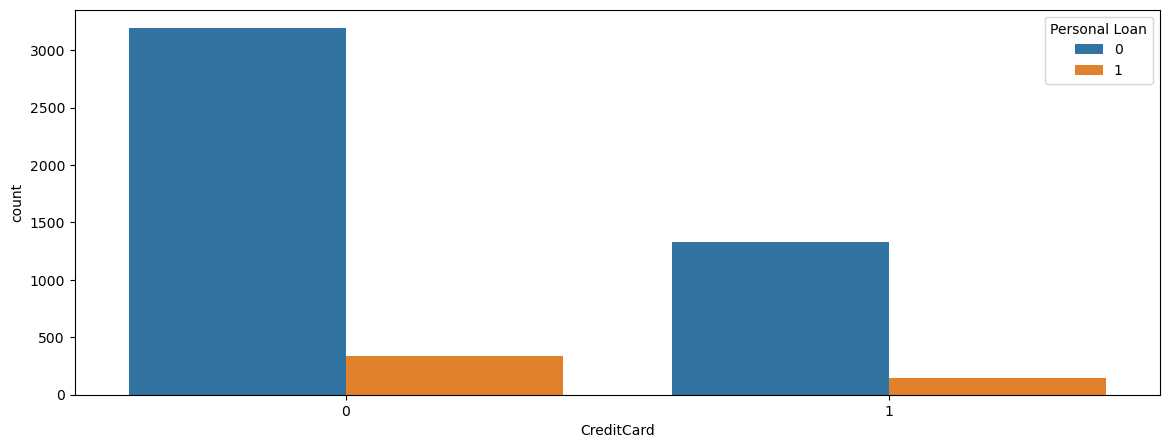

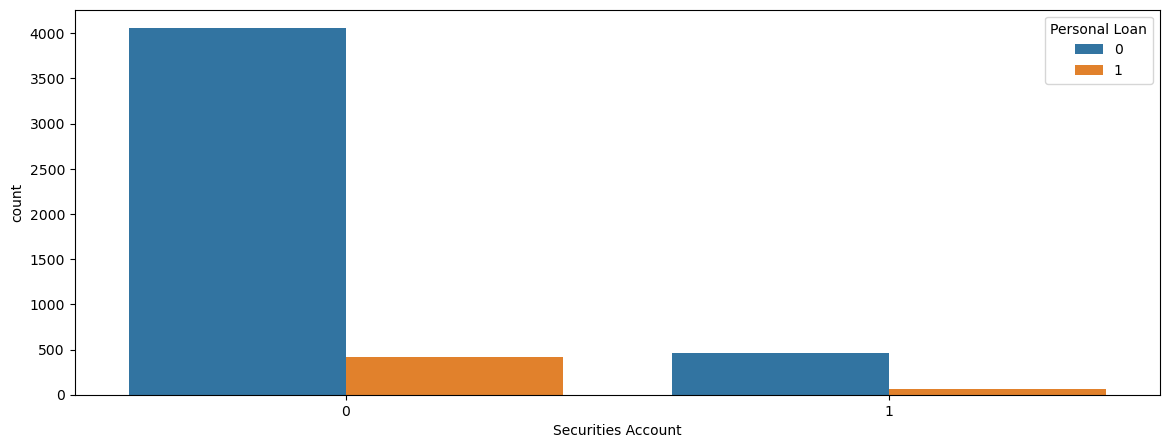

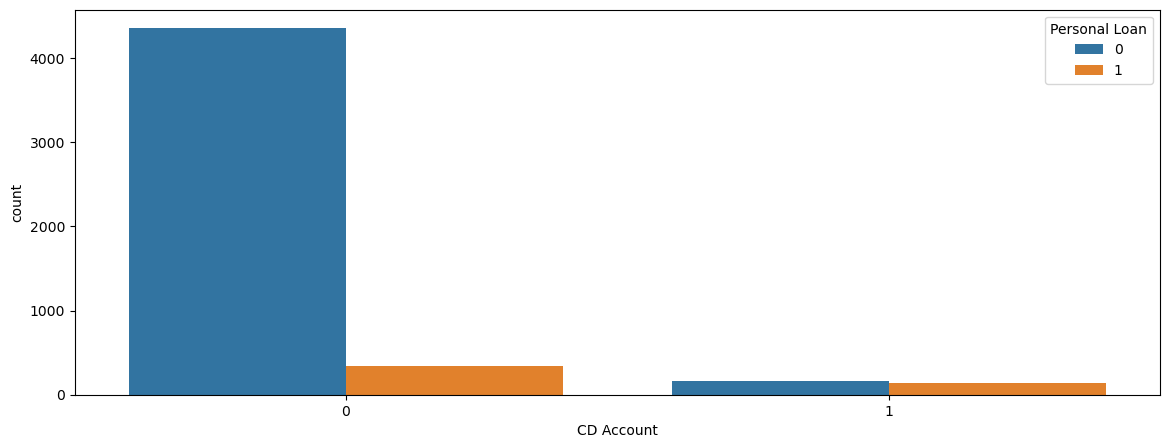

In [30]:
cat_features = ['Education', 'Online', 'Family','CreditCard','Securities Account','CD Account']

# Loop over the categorical features and call the function for each one
for feature in cat_features:
    save_path = f'images/personal/{feature}VSdeposit.png'
    create_countplot(df, feature, colors, save_path)

In [37]:
# The number of customers with higher education are buying Personal Loan compared to other groups.
# Customers who use online services are more likely to take loans compared to the rest.
# Family with size more than 2 are more intrested in personal loans
# People who were not using the Credit Card are seen tho have opted more for personal loan
# People who did not have Securities Acoount have opted more for loan
# People with no CD Account are more channeled towards Personal Loan

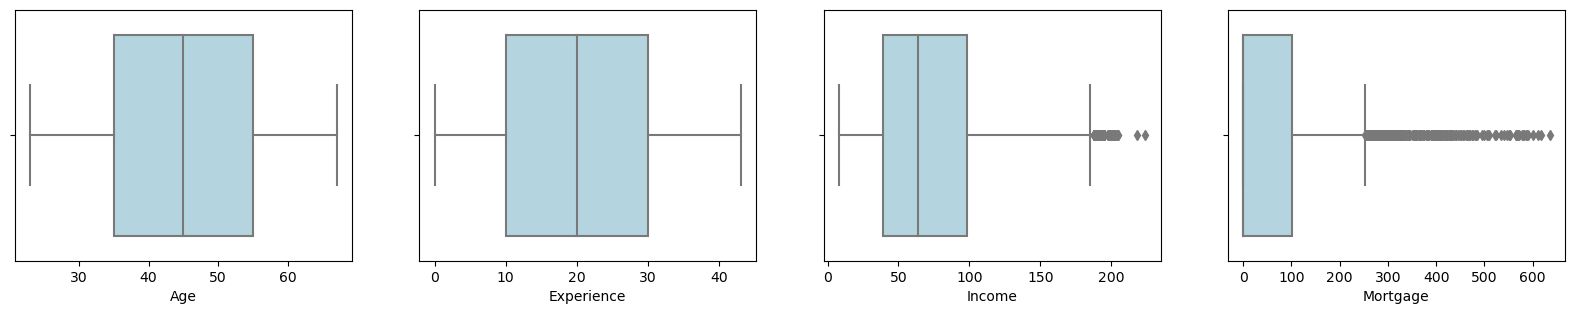

In [31]:
plt.figure(figsize= (20,15))
plt.subplot(4,4,1)
sns.boxplot(x= df["Age"], color='lightblue')

plt.subplot(4,4,2)
sns.boxplot(x= df["Experience"], color='lightblue')

plt.subplot(4,4,3)
sns.boxplot(x= df["Income"], color='lightblue')

plt.subplot(4,4,4)
sns.boxplot(x= df["Mortgage"], color='lightblue')

plt.savefig(f'images/personal/outliers.png')
plt.show()

In [32]:
## treat the outliers
def treat_outliers(df, col):
    Q1 = df[col].quantile(0.25)  # 1st quantile
    Q3 = df[col].quantile(0.75)  # 3rd quantile
    IQR = Q3 - Q1
    Lower_whisker = Q1 - 1.5 * IQR
    Upper_whisker = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], Lower_whisker, Upper_whisker)
    return df

In [33]:
df1 = treat_outliers(
    df, 'Mortgage') 

In [34]:
df.shape,df1.shape

((5000, 14), (5000, 14))

In [35]:
df.head(1)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1.0,49,91107,4,1.6,1,0.0,0,1,0,0,0


In [46]:
# df1.drop(['County','Regions'],axis=1,inplace=True)

## Feature Selection

In [71]:
x=df.drop(['Personal Loan'],axis=1)
y=df['Personal Loan'] 

[0.03591926 0.03793171 0.0387854  0.33907194 0.03564129 0.08007134
 0.15122992 0.1324861  0.02720052 0.00986649 0.07878558 0.0143013
 0.01870913]


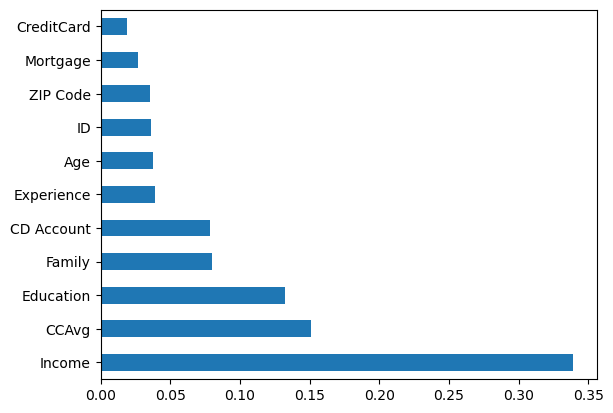

In [74]:
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based clas
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.savefig(f'images/personal/feature_selection.png')
plt.show()

In [79]:
x=x.drop(['CreditCard','Mortgage','ID','ZIP Code','Age'],axis=1)

## Train and Test split and scaling

In [36]:
# X = df1.drop('Personal Loan', axis=1)
# y = df1['Personal Loan']

In [80]:
from sklearn import model_selection, neighbors
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.3)

# from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(X_train)
xtest=scaler.transform(X_test)

In [81]:
X_train.head()

,Experience,Income,Family,CCAvg,Education,Securities Account,CD Account,Online
1235,28.0,60,4,2.6,3,0,0,0
1188,19.0,58,2,0.4,3,1,0,0
1645,32.0,89,4,1.0,2,1,0,1
3136,34.0,65,3,2.2,3,1,1,0
3395,16.0,35,2,1.4,2,0,0,0


In [39]:
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

## 1. Logistic Regression -sklearn

In [84]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
y_pred_sk = logreg.predict(X_test)

In [86]:
print('Accuracy:', accuracy_score(Y_test, y_pred_sk))
print('Precision:', precision_score(Y_test, y_pred_sk))
print('Recall:', recall_score(Y_test, y_pred_sk))
print('F1 Score:', f1_score(Y_test, y_pred_sk))
print('ROC AUC Score:', roc_auc_score(Y_test, y_pred_sk))

Accuracy: 0.946
Precision: 0.6583333333333333
Recall: 0.6638655462184874
F1 Score: 0.6610878661087867
ROC AUC Score: 0.8170884573959923


In [88]:
print(classification_report(Y_test, y_pred_sk))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1381
           1       0.66      0.66      0.66       119

    accuracy                           0.95      1500
   macro avg       0.81      0.82      0.82      1500
weighted avg       0.95      0.95      0.95      1500



## 2. Logistic Regression -statsmodel

In [89]:
lr_model = sm.Logit(Y_train, X_train)
result = lr_model.fit()
y_pred_sm = result.predict(X_test)
threshold = 0.5
y_pred_sm[y_pred_sm < threshold] = 0
y_pred_sm[y_pred_sm >= threshold] = 1
accuracy = accuracy_score(Y_test, y_pred_sm) 
print('Accuracy:', accuracy)
print('Precision:', precision_score(Y_test, y_pred_sm))
print('Recall:', recall_score(Y_test, y_pred_sm))
print('F1 Score:', f1_score(Y_test, y_pred_sm))
print('ROC AUC Score:', roc_auc_score(Y_test, y_pred_sm))

Optimization terminated successfully.
         Current function value: 0.294131
         Iterations 7
Accuracy: 0.9106666666666666
Precision: 0.4157303370786517
Recall: 0.31092436974789917
F1 Score: 0.3557692307692308
ROC AUC Score: 0.6366352478717772


In [91]:
print(classification_report(Y_test, y_pred_sm))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1381
           1       0.42      0.31      0.36       119

    accuracy                           0.91      1500
   macro avg       0.68      0.64      0.65      1500
weighted avg       0.90      0.91      0.90      1500



## 3. Decision tree -sklearn

In [93]:
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)
y_pred_d = tree.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred_d)
print('Accuracy:', accuracy)

Accuracy: 0.9853333333333333


In [95]:
print('Accuracy:', accuracy_score(Y_test, y_pred_d))
print('Precision:', precision_score(Y_test, y_pred_d))
print('Recall:', recall_score(Y_test, y_pred_d))
print('F1 Score:', f1_score(Y_test, y_pred_d))
print('ROC AUC Score:', roc_auc_score(Y_test, y_pred_d))

Accuracy: 0.9853333333333333
Precision: 0.9145299145299145
Recall: 0.8991596638655462
F1 Score: 0.9067796610169491
ROC AUC Score: 0.9459592671246629


In [98]:
print(classification_report(Y_test, y_pred_d))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1381
           1       0.91      0.90      0.91       119

    accuracy                           0.99      1500
   macro avg       0.95      0.95      0.95      1500
weighted avg       0.99      0.99      0.99      1500



## 4. Decision Tree -xgboost

In [96]:
clf = xgb.XGBClassifier()
clf.fit(X_train, Y_train)
y_pred_dxgb = clf.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred_dxgb)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9913333333333333


In [97]:
print('Accuracy:', accuracy_score(Y_test, y_pred_dxgb))
print('Precision:', precision_score(Y_test, y_pred_dxgb))
print('Recall:', recall_score(Y_test, y_pred_dxgb))
print('F1 Score:', f1_score(Y_test, y_pred_dxgb))
print('ROC AUC Score:', roc_auc_score(Y_test, y_pred_dxgb))

Accuracy: 0.9913333333333333
Precision: 0.9732142857142857
Recall: 0.9159663865546218
F1 Score: 0.9437229437229437
ROC AUC Score: 0.9568970238348778


In [99]:
print(classification_report(Y_test, y_pred_dxgb))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1381
           1       0.97      0.92      0.94       119

    accuracy                           0.99      1500
   macro avg       0.98      0.96      0.97      1500
weighted avg       0.99      0.99      0.99      1500

